In [1]:
#script 3  Generalized coordinates with Action
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz, cholesky, sqrtm, inv
from math import e
# Define time settings
T = 150
dt = 0.005
time = np.arange(0, T, dt)
N  = time.size

x = np.zeros(N)
x_dot = np.zeros(N)
y = np.zeros(N)
y_dot = np.zeros(N)
mu = np.zeros(N)
mu_dot = np.zeros(N)
u = np.zeros(N)

omega_w0 = np.zeros(N)
omega_w1 = np.zeros(N)
omega_z0 = np.zeros(N)
omega_z1 = np.zeros(N)

omega_w0[0] = 1
omega_w1[0] = 1
omega_z0[0] = 0.1
omega_z1[0] = 1

alpha_mu = 3
alpha_u = 10
alpha_w = 0.1
alpha_z = 0.1

x[0] = 30
mu[0] =25
mu_v = 25

mu_dot[0] = - mu[0] + mu_v

D = np.array([[0,1],[0,0]])

def sigmoid(omega):
    
    gain = 1/(1+e**(-omega))
    return gain



for i in np.arange(0,N-1):
    
    #generative process(in geval van wél aciton)
    x_dot[i] = u[i]  #np.random.randn(1)*0.5
    x[i+1] = x[i] + dt*x_dot[i]

    if i<0.35*N:
        mu_v = 25 + 5*sigmoid(omega_z0[i])# + 3*np.sin(10*1/N*i)
        y[i] = x[i] #+ np.random.randn(1)*2#*np.sin(10*1/N*i)
        y_dot[i] = x_dot[i] #+ np.random.randn(1)*2
    
    # if i<0.3*N:
    #    mu_v = 25 + 5*sigmoid(omega_z0[i])# + 3*np.sin(10*1/N*i)
    #    y[i] = x[i] + np.random.randn(1)*0.5#*np.sin(10*1/N*i)
    #    y_dot[i] = x_dot[i] #+ np.random.randn(1)*2
    
    else:
        mu_v = 25 + 5*sigmoid(omega_z0[i]) #+ 3*np.sin(10*1/N*i)
        y[i] = x[i] + np.random.randn(1)*3*np.sin(10*1/N*i)
        y_dot[i] = x_dot[i] #+ np.random.randn(1)*2


    #Set precision matrices for iteration
    PI_w = np.diag([1,1])
    PI_z = np.diag([omega_z0[i],1])


    #prediction errors
    e_x = np.array([[mu_dot[i]], [0]]) - (np.array([[-mu[i]],[-mu_dot[i]]])+np.array([[mu_v],[0]]))
    e_y = np.array([[y[i]],[y_dot[i]]]) - np.array([[mu[i]],[mu_dot[i]]]) #- np.array([[5],[0]])
    

    #belief update
    dFdmu = np.array([[1,1],[0,1]]).T.dot(np.dot(PI_w,e_x)) - np.dot(np.identity(2),np.dot(PI_z,e_y))
    dmu = np.array([[mu_dot[i]], [0]]) - alpha_mu*dFdmu
    
    mu[i+1] = mu[i] + dt*dmu[0]
    mu_dot[i+1] = mu_dot[i] +dt*dmu[1]
 
    #action
    
    u_dot = -np.array([0,1]).dot(PI_z).dot(e_y)
    u[i+1] = u[i] + alpha_u*dt*u_dot
  

    #   precision updating
    # dPI_w = alpha_w*0.5*(inv(PI_w) - np.diag(e_x.flatten())**2)
    dPI_z = alpha_z*0.5*(inv(PI_z) - np.diag(e_y.flatten())**2)

    # PI_w = PI_w + dt*dPI_w
    PI_z = PI_z + dt*dPI_z


    

    omega_w0[i+1] = PI_w[0,0]
    omega_w1[i+1] = PI_w[1,1]
    omega_z0[i+1] = PI_z[0,0]
    omega_z1[i+1] = PI_z[1,1]


Text(0.5, 1.0, 'Estimated Variance')

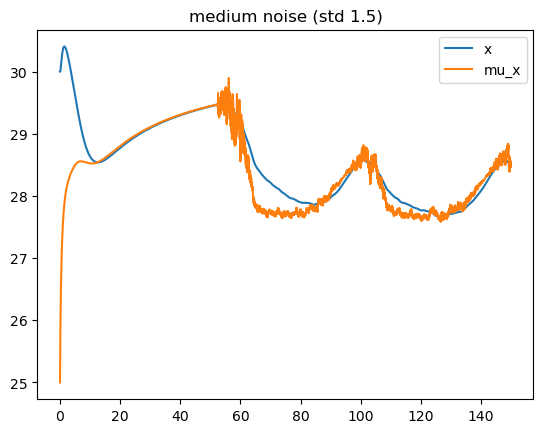

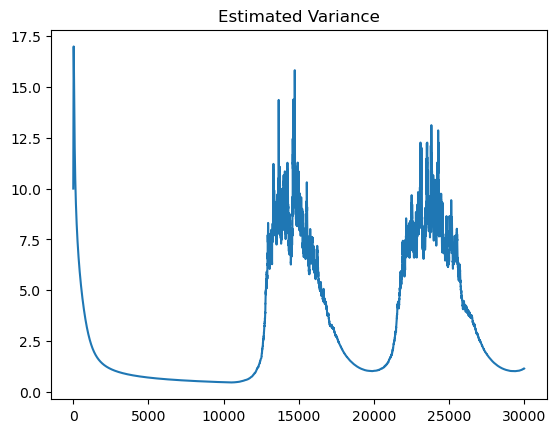

In [2]:
#plot 3

plt.figure()
plt.plot(time, x, label = "x")
plt.plot(time, mu, label = "mu_x")
plt.legend()
plt.title("medium noise (std 1.5)")
# plt.plot(mu_dot)

# plt.figure()
# plt.plot(x_dot, label= "xdot")
# plt.plot(mu_dot, label = "mudot")
# plt.legend()

# plt.figure()
# plt.plot(mu)

plt.figure()
#plt.plot(1/omega_z0)
plt.plot(1/omega_z0)
plt.title("Estimated Variance")